## Plotting directly with Matplotlib

In [1]:
# Create and customize basic plots directly with Matplotlib on dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.7.3


In [203]:
# Dataset: Immigration to Canada from 1980 to 2013 - 
# International migration flows to and from selected countries
# The 2015 revision from United Nation's website.

# Fetching data

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv")
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [204]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [205]:
# dimensions of the dataframe
df.shape

(195, 39)

In [206]:
# Set the country name as index 

df.set_index('Country', inplace=True)
df.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [207]:
# let's create a list of years from 1980 - 2013

years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Line Plot

In [208]:
# A line plot displays the relationship between two continuous variables
# over a continuous interval, showing the trend or pattern of the data.

# Let's created a line plot to visualize the immigrants (to Canada) 
# trend during 1980 to 2013.

df_line = df[years]

total_immigrants = df_line.sum()
total_immigrants.head()

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
dtype: int64

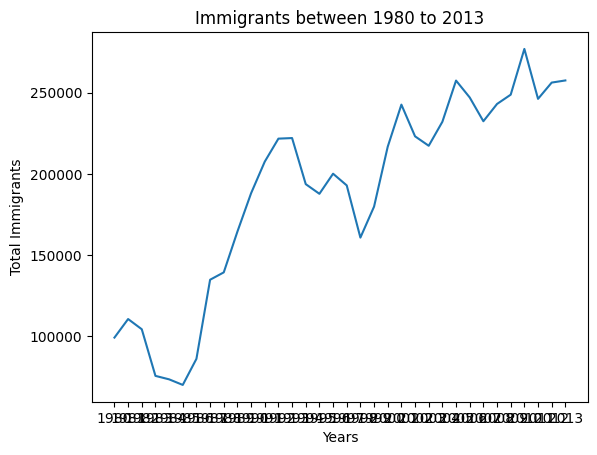

In [209]:
# Create figure and axes
fig, ax = plt.subplots()

# plot the line
ax.plot(total_immigrants)
ax.set_title('Immigrants between 1980 to 2013')
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')

plt.show()

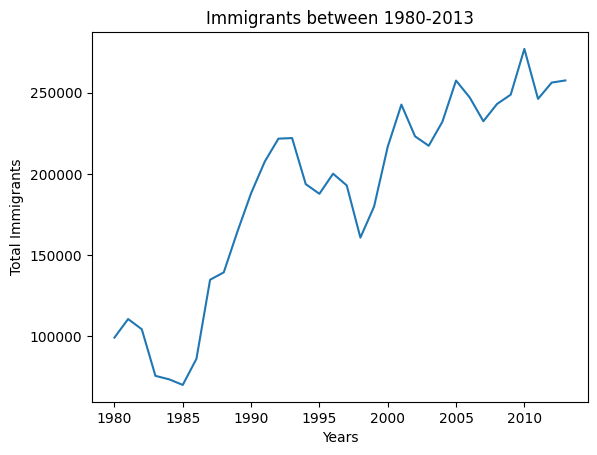

In [210]:
# The plot function populated the x-axis with the index values (years), and the y-axis with the column values (population).
# However, notice how the years were not displayed because they are of type string.
# Therefore, let's change the type of the index values to integer for plotting
fig, ax = plt.subplots()

total_immigrants.index = total_immigrants.index.map(int) #changing the index to integer
ax.plot(total_immigrants)
ax.set_title('Immigrants between 1980-2013')
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')
plt.show()

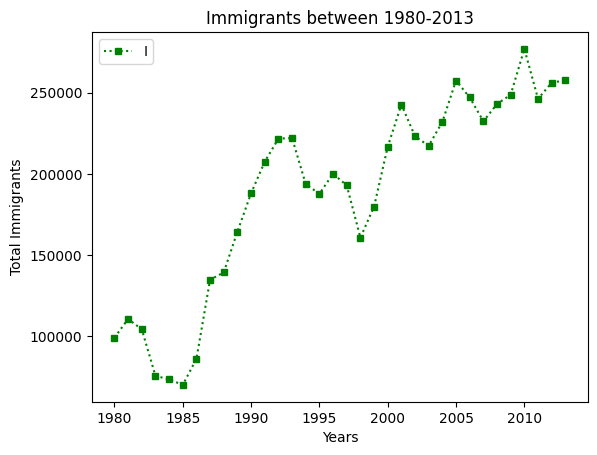

In [211]:
# Let's now customize the above plot's appearance
fig, ax = plt.subplots()
total_immigrants.index = total_immigrants.index.map(int)
ax.plot(total_immigrants,
        marker='s', # including markers in squares shapes
        markersize=5, # setting the size of the marker
        color = 'green', # changing the color of the line
        linestyle = 'dotted') # changing the line style to a dotted line
ax.set_title('Immigrants between 1980-2013')
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')
ax.legend('Immigrants')

plt.show()

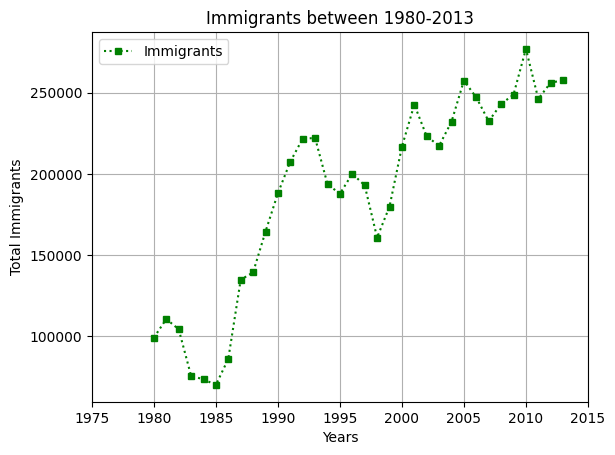

In [212]:
# Let's include the background grid, a legend and try to change the limits on the axis

fig, ax = plt.subplots()
ax.plot(total_immigrants,
       marker='s',
       markersize=5,
       color='green',
       linestyle='dotted')

ax.set_title('Immigrants between 1980-2013')
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')

plt.xlim(1975, 2015)
plt.grid(True)
plt.legend(['Immigrants'])

plt.show()

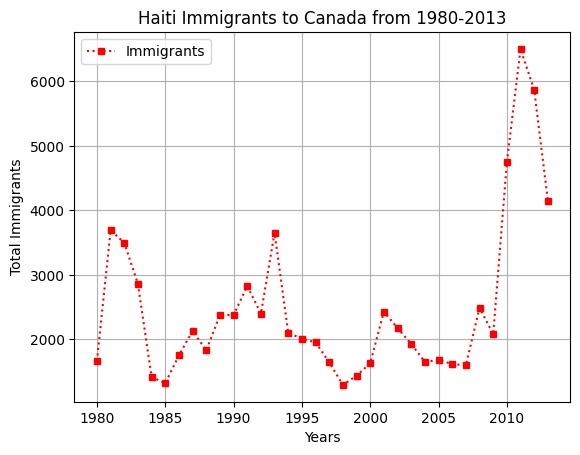

In [213]:
# Plot a line graph of immigration from Haiti

df_haiti = df.loc[['Haiti'], years].transpose()
df_haiti.index = df_haiti.index.map(int)

fig, ax = plt.subplots()

ax.plot(df_haiti,
       marker='s',
       markersize=5,
       color='red',
       linestyle='dotted')
ax.set_title('Haiti Immigrants to Canada from 1980-2013')
ax.set_xlabel('Years')
ax.set_ylabel('Total Immigrants')
plt.grid(True)
plt.legend(['Immigrants'])

plt.show()

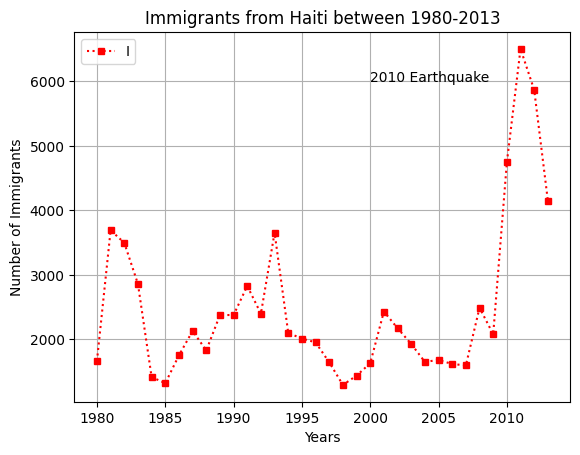

In [214]:
# We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti.
# Let's annotate this spike in the plot by using the ax.annotate() method

fig, ax = plt.subplots()
ax.plot(df_haiti, marker='s', markersize=5, color='red', linestyle='dotted')
ax.set_title('Immigrants from Haiti between 1980-2013')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')
plt.grid(True)
plt.legend('Immigrants')
ax.annotate('2010 Earthquake', xy=(2000,6000))

plt.show()

## Scatter Plot

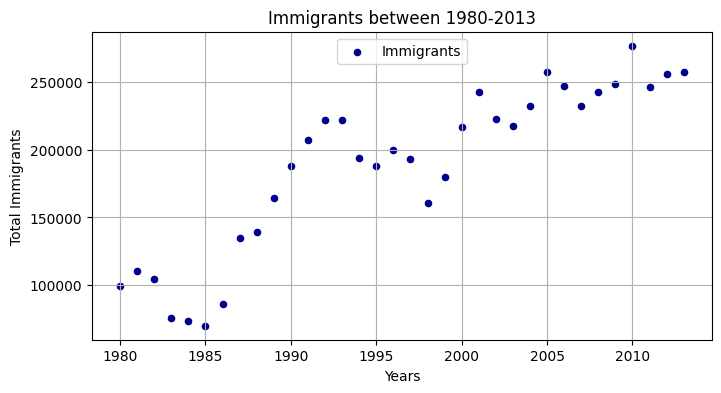

In [215]:
# Let's created a Scatter plot to visualize the immigrants (to Canada) 
# trend during 1980 to 2013.
# We need the Total of year-wise immigrants

df_total = df[years].sum().transpose()
df_total.index = df_total.index.map(int)

fig, ax = plt.subplots(figsize=(8, 4)) # create figure and axes

ax.scatter(df_total.index, df_total, marker='o', s=20, color='darkblue')
plt.title('Immigrants between 1980-2013')
plt.xlabel('Years')
plt.ylabel('Total Immigrants')
plt.grid(True)
ax.legend(['Immigrants'], loc='upper center')

plt.show()

### Bat Plot

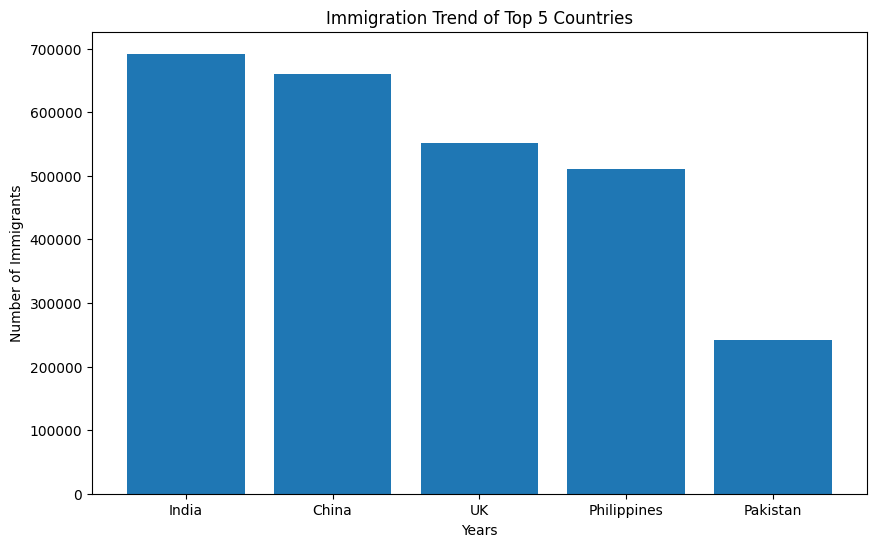

In [216]:
# Let's create a bar plot to visualize the top 5 countries that contribued 
# the most immigrants to Canada from 1980 to 2013.

df.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top5 = df.head(5)
df_top5 = df_top5.reset_index()
country_list = list(df_top5.Country)
country_list[2] = 'UK'  # short form of United Kingdome

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(country_list, df_top5['Total'], label=country_list)
ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

plt.show()

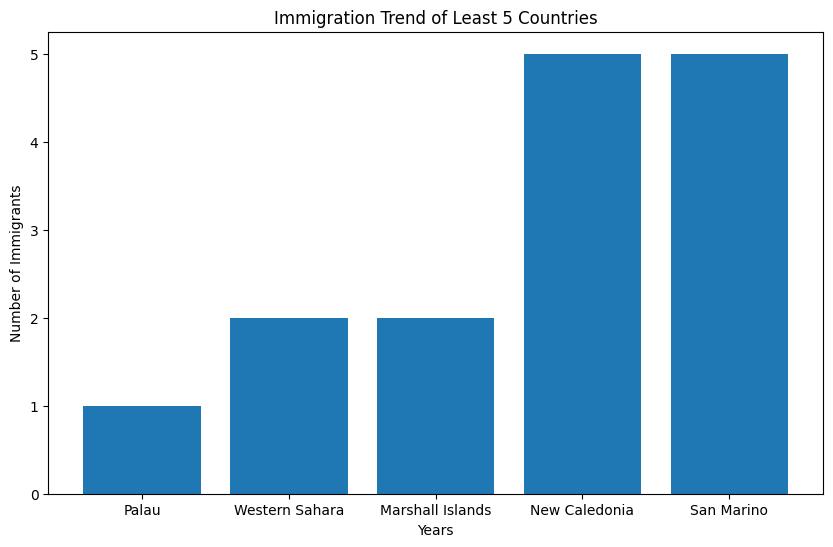

In [217]:
# Create a bar plot of the 5 countries that contributed the 
# least to immigration to Canada from 1980 to 2013

df.sort_values(['Total'], ascending=True, axis=0, inplace=True)
df_least5 = df.head(5)
df_least5 = df_least5.reset_index()
country_list = list(df_least5.Country)

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(country_list, df_least5['Total'], label=country_list)
ax.set_title('Immigration Trend of Least 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

plt.show()

### Histogram

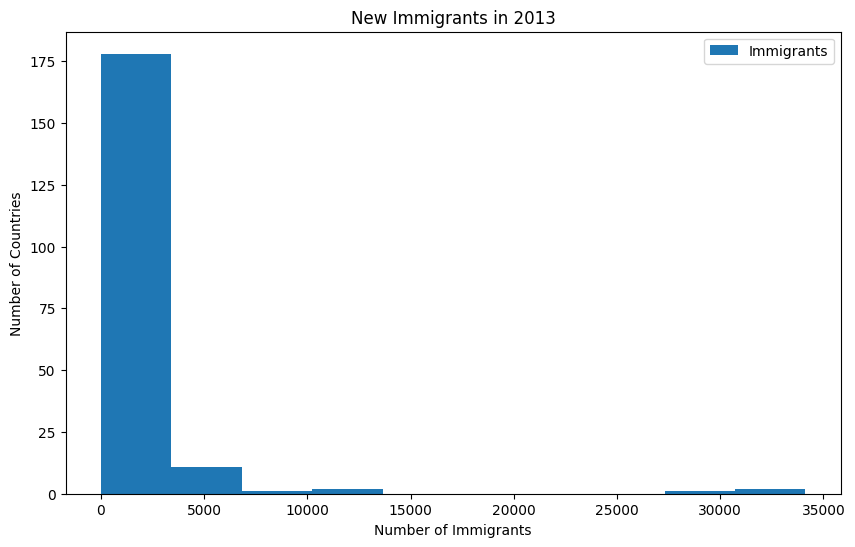

In [218]:
# Let's find out the frequency distribution of the number (population) 
# of new immigrants from the various countries to Canada in 2013

df_country = df.groupby(['Country'])['2013'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_country['2013'])
ax.set_title('New Immigrants in 2013')
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Countries')
ax.legend(['Immigrants'])

plt.show()

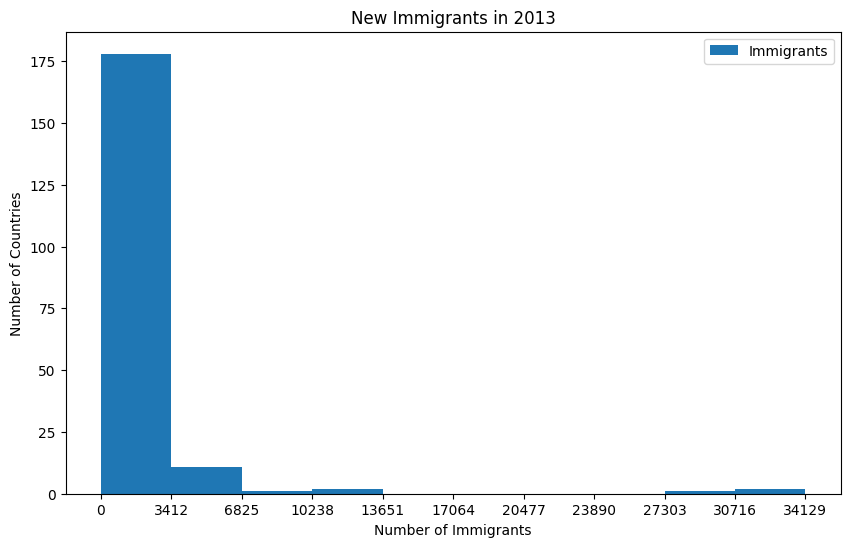

In [219]:
# 2 hist plot

fig, ax = plt.subplots(figsize=(10,6))
count = ax.hist(df_country['2013'])

ax.set_title('New Immigrants in 2013')
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Countries')
ax.set_xticks(list(map(int, count[1])))
ax.legend(['Immigrants'])

plt.show()

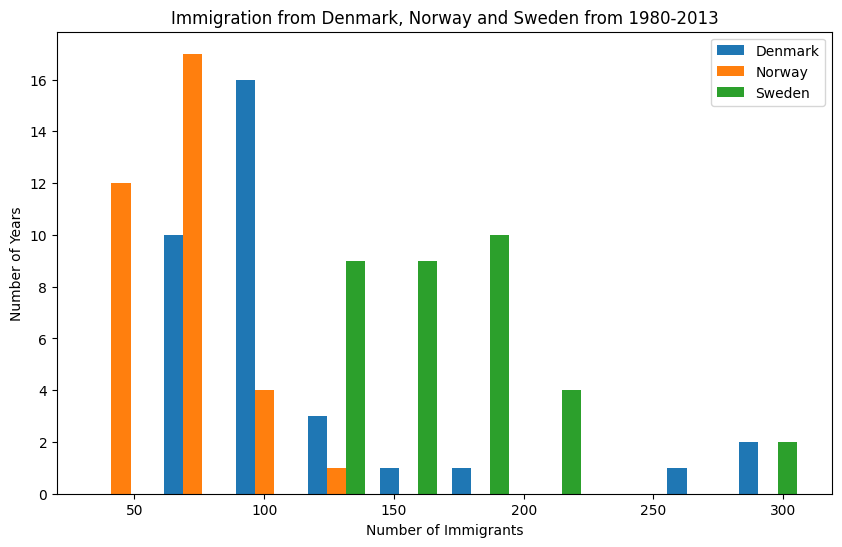

In [220]:
# What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013

df_DNS = df.loc[['Denmark', 'Norway', 'Sweden'], years]
df_DNS = df_DNS.transpose()

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_DNS)
ax.set_title('Immigration from Denmark, Norway and Sweden from 1980-2013')
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Years')
ax.legend(['Denmark', 'Norway', 'Sweden'])

plt.show()

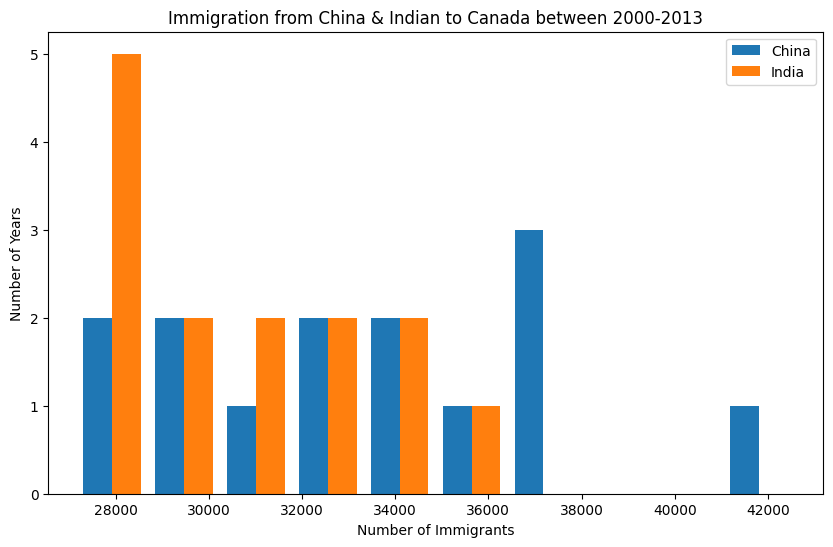

In [221]:
# What is the immigration distribution for China and India for years 2000 to 2013

year20 = list(map(str, range(2000, 2014)))
df_CI = df.loc[['China', 'India'], year20]
df_CI = df_CI.T

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_CI)
ax.set_title('Immigration from China & Indian to Canada between 2000-2013')
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Years')
ax.legend(['China', 'India'])

plt.show()

### Pie Chart

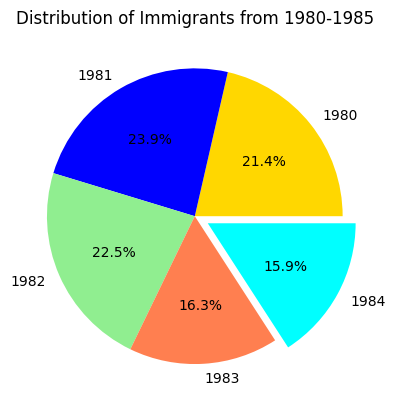

In [222]:
# Let's create a pie chart representing the 'Total Immigrants' for the year 1980 to 1985
fig, ax = plt.subplots()

ax.pie(df_total[0:5], labels=years[0:5],
      colors = ['gold', 'blue', 'lightgreen', 'coral', 'cyan'],
      autopct = '%1.1f%%', explode = [0,0,0,0,0.1])

ax.set_aspect('equal')
plt.title('Distribution of Immigrants from 1980-1985')

plt.show()

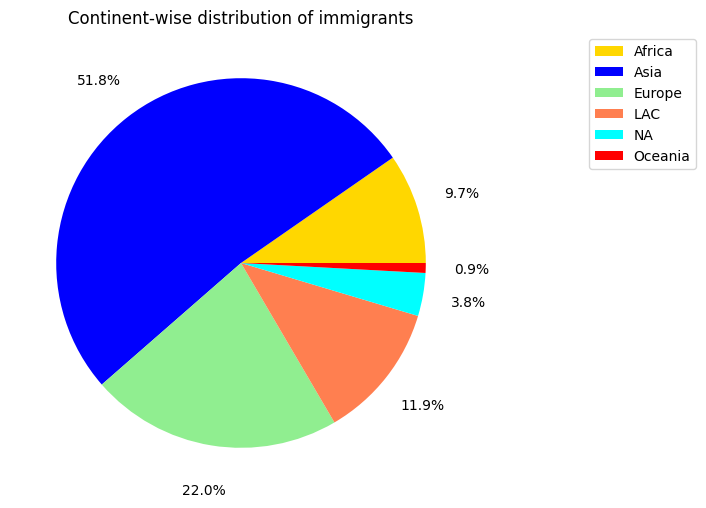

In [229]:
# Create a pie chart representing the total immigrants proportion for each continent

df_con = df.groupby('Continent')['Total'].sum().reset_index()
label = list(df_con['Continent'])
label[3] = 'LAC'
label[4] = 'NA'

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(df_con['Total'], colors = ['gold', 'blue', 'lightgreen', 'coral','cyan', 'red'],
      autopct = '%1.1f%%', pctdistance=1.25)
ax.set_aspect('equal')
plt.title('Continent-wise distribution of immigrants')
ax.legend(label, bbox_to_anchor=(1,0,0.5,1))
plt.show()

In [228]:
df_con

,Continent,Total
0,Africa,618948
1,Asia,3317794
2,Europe,1410947
3,Latin America and the Caribbean,765148
4,Northern America,241142
5,Oceania,55174


### Sub-plotting

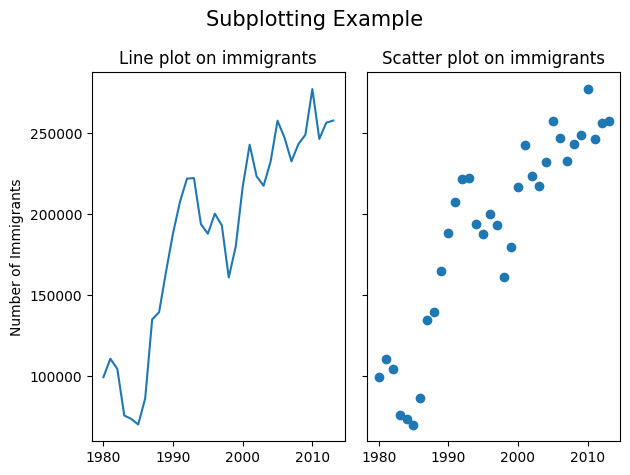

In [230]:
# Create a figure with two axes in a row

fig, axs = plt.subplots(1, 2, sharey=True)

#Plotting in first axes - the left one
axs[0].plot(total_immigrants)
axs[0].set_title("Line plot on immigrants")

#Plotting in second axes - the right one
axs[1].scatter(total_immigrants.index, total_immigrants)
axs[1].set_title("Scatter plot on immigrants")

axs[0].set_ylabel("Number of Immigrants")
            
#Adding a Title for the Overall Figure
fig.suptitle('Subplotting Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()


# Show the figure
plt.show()

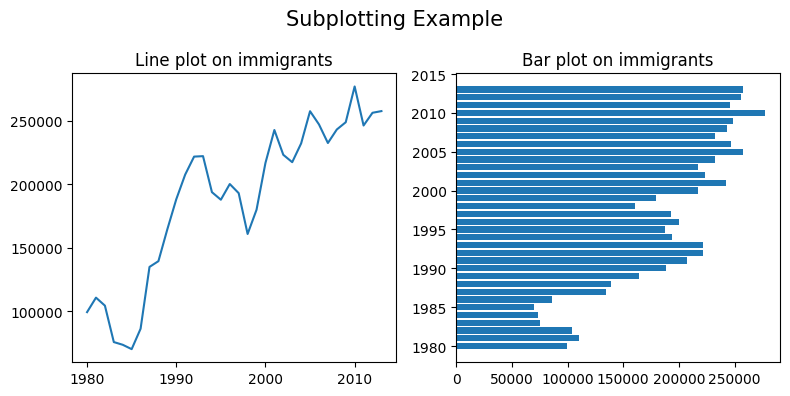

In [231]:
# Create a figure with Four axes - two rows, two columns
fig = plt.figure(figsize=(8,4))

# Add the first subplot (top-left)
axs1 = fig.add_subplot(1, 2, 1)
#Plotting in first axes - the left one
axs1.plot(total_immigrants)
axs1.set_title("Line plot on immigrants")

# Add the second subplot (top-right)
axs2 = fig.add_subplot(1, 2, 2)
#Plotting in second axes - the right one
axs2.barh(total_immigrants.index, total_immigrants) #Notice the use of 'barh' for creating horizontal bar plot
axs2.set_title("Bar plot on immigrants")
            
#Adding a Title for the Overall Figure
fig.suptitle('Subplotting Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()


# Show the figure
plt.show()

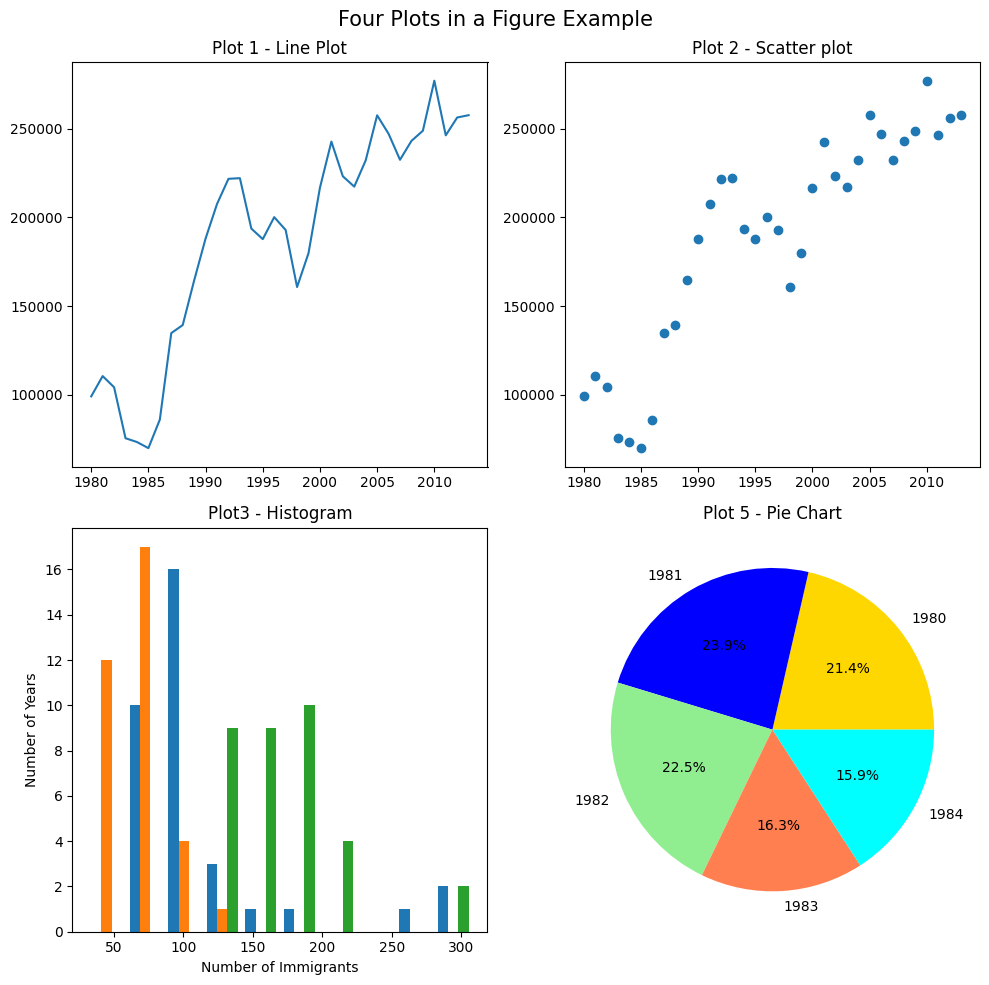

In [233]:
# Choose any four plots, which you have developed in this lab, 
# with subplotting display them in a 2x2 display

fig = plt.figure(figsize=(10, 10))

    # Add the first subplot (top-left)
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(total_immigrants)
ax1.set_title('Plot 1 - Line Plot')

    # Add the second subplot (top-right)
ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(total_immigrants.index, total_immigrants)
ax2.set_title('Plot 2 - Scatter plot')

    # Add the third subplot (bottom-left)
ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(df_DNS)
ax3.set_title('Plot3 - Histogram') 
ax3.set_xlabel('Number of Immigrants')
ax3.set_ylabel('Number of Years')

    # Add the fourth subplot (bottom-right)
ax4 = fig.add_subplot(2, 2, 4)
ax4.pie(total_immigrants[0:5], labels=years[0:5], 
        colors = ['gold','blue','lightgreen','coral','cyan'],
        autopct='%1.1f%%')
ax4.set_aspect('equal')  
ax4.set_title('Plot 5 - Pie Chart')

    #Adding a Title for the Overall Figure
fig.suptitle('Four Plots in a Figure Example', fontsize=15)

    # Adjust spacing between subplots
fig.tight_layout()


    # Show the figure
plt.show()

### Thank you

## Author

<a href="https://www.linkedin.com/in/neeleshchidar37/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01">Neelesh Chidar</a>